In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

In [44]:
data = pd.read_csv("/root/mlops_projects/FinancialSentiment_prediction/Datasets/Financial_data.csv")
data.head(5)

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,neutral
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",neutral
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [45]:
pd.set_option('display.max_colwidth', None)

In [46]:
data.sample()

,Sentence,Sentiment
3399,"The core of Solidium 's investment strategy is proper , value enhancing asset management of the current holdings .",neutral


In [47]:
data.shape

(5842, 2)

In [48]:
#checking for basic info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [49]:
#checking is any null values
data.isnull().sum()

Sentence     0
Sentiment    0
dtype: int64

In [50]:
# checking any duplicated values
data.duplicated().sum()

np.int64(520)

In [51]:
data[data.duplicated(keep='first')]

,Sentence,Sentiment
266,"Finnish GeoSentric 's net sales decreased to EUR 939,000 in January-March 2009 .",negative
283,"Sales in Finland decreased by 10.5 % in January , while sales outside Finland dropped by 17 % .",negative
349,Full-year operating result for 2008 was 3.6 million negative .,negative
387,"Making matters more difficult , the company said it has been grappling with higher oil and gas prices , which have pushed up the cost of energy , raw materials and transportation .",positive
496,"Antti Orkola , president of Kemira GrowHow 's Industrial Solutions unit , told Thomson Financial News the company has put off opening the mine as prices of phosphate have been ` quite depressed for a long time ' . '",neutral
...,...,...
5827,"( ADPnews ) - Oct 21 , 2009 - Finland-based IT consultancy Tieto Oyj ( HEL : TIE1V ) said today its net profit plunged to EUR 29.4 million ( USD 43.9 m ) for the first nine months of 2009 from EUR 58.7 million for the same period o",positive
5831,Finnish developer and manufacturer of mobile phone chargers Salcomp Plc OMX Helsinki : SAL1V on Wednesday 19 November lowered its full-year net sales estimate .,neutral
5832,Operating profit fell to EUR 38.1 mn from EUR 55.3 mn in 2007 .,positive
5837,RISING costs have forced packaging producer Huhtamaki to axe 90 jobs at its Hampshire manufacturing plant .,neutral


In [52]:
data[data.duplicated(keep=False)].sort_values(by="Sentence")[:10]

,Sentence,Sentiment
4578,"( ADP News ) - Feb 11 , 2009 - Finnish wood products technology supplier Raute Oyj ( HEL : RUTAV ) said today its net profit decreased to EUR 4.7 million ( USD 6.1 m ) for 2008 from EUR 6.6 million for 2007 .",positive
3685,"( ADP News ) - Feb 11 , 2009 - Finnish wood products technology supplier Raute Oyj ( HEL : RUTAV ) said today its net profit decreased to EUR 4.7 million ( USD 6.1 m ) for 2008 from EUR 6.6 million for 2007 .",positive
3765,"( ADP News ) - Feb 12 , 2009 - Finnish construction company Lemminkainen Oyj ( HEL : LEM1S ) said today its net profit decreased to EUR 63.5 million ( USD 81.1 m ) for 2008 from EUR 80.6 million for 2007 .",neutral
1488,"( ADP News ) - Feb 12 , 2009 - Finnish construction company Lemminkainen Oyj ( HEL : LEM1S ) said today its net profit decreased to EUR 63.5 million ( USD 81.1 m ) for 2008 from EUR 80.6 million for 2007 .",neutral
1051,"( ADP News ) - Feb 4 , 2009 - Finnish broadband data communication systems and solutions company Teleste Oyj ( HEL : TLT1V ) said today its net profit decreased to EUR 5.5 million ( USD 7.2 m ) for 2008 from EUR 9.4 million for 200",neutral
740,"( ADP News ) - Feb 4 , 2009 - Finnish broadband data communication systems and solutions company Teleste Oyj ( HEL : TLT1V ) said today its net profit decreased to EUR 5.5 million ( USD 7.2 m ) for 2008 from EUR 9.4 million for 200",neutral
2846,"( ADP News ) - Jan 22 , 2009 - Finnish mobile phones maker Nokia Oyj ( OMX : NOK1V ) said today its operating profit decreased to EUR 5 billion ( USD 6.5 bn ) for 2008 from EUR 8 billion for 2007 .",neutral
4051,"( ADP News ) - Jan 22 , 2009 - Finnish mobile phones maker Nokia Oyj ( OMX : NOK1V ) said today its operating profit decreased to EUR 5 billion ( USD 6.5 bn ) for 2008 from EUR 8 billion for 2007 .",neutral
1581,"( ADPnews ) - Dec 1 , 2009 - Finnish cutlery and hand tools maker Fiskars Oyj Abp ( HEL : FISAS ) said today that it will make redundant a total of 18 office and management staff members of its subsidiary Iittala Group Ltd. .",positive
491,"( ADPnews ) - Dec 1 , 2009 - Finnish cutlery and hand tools maker Fiskars Oyj Abp ( HEL : FISAS ) said today that it will make redundant a total of 18 office and management staff members of its subsidiary Iittala Group Ltd. .",positive


In [53]:
data.drop_duplicates(keep='first',inplace=True)

In [54]:
data.duplicated().sum()

np.int64(0)

In [55]:
data[data["Sentence"].str.strip()==" "]

,Sentence,Sentiment


In [56]:
# Convert the 'clean_comment' column to lowercase
data['Sentence'] = data['Sentence'].str.lower()

# Verify the transformation by displaying the first few rows
data.head()

,Sentence,Sentiment
0,"the geosolutions technology will leverage benefon 's gps solutions by providing location based search technology , a communities platform , location relevant multimedia content and a new and powerful commercial model .",neutral
1,"$esi on lows, down $1.50 to $2.50 bk a real possibility",negative
2,"for the last quarter of 2010 , componenta 's net sales doubled to eur131m from eur76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of eur7m .",neutral
3,"according to the finnish-russian chamber of commerce , all the major construction companies of finland are operating in russia .",neutral
4,"the swedish buyout firm has sold its remaining 22.4 percent stake , almost eighteen months after taking the company public in finland .",neutral


In [57]:
#checking for any rows that has started with or endded with empty spaces
data[data['Sentence'].apply(lambda x: x.endswith(' ') or x.startswith(' '))]

,Sentence,Sentiment


In [58]:
# Identify comments containing URLs
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
comments_with_urls = data[data['Sentence'].str.contains(url_pattern, regex=True)]

# Display the comments containing URLs
comments_with_urls.head()

,Sentence,Sentiment
11,$sap q1 disappoints as #software licenses down. real problem? #cloud growth trails $msft $orcl $goog $crm $adbe https://t.co/jndphllzq5,neutral
16,$msft sql server revenue grew double-digit with sql server premium revenue growing over 30% http://stks.co/ir2f,neutral
26,costco: a premier retail dividend play https://t.co/fa5cnh2t0t $cost,neutral
64,"rt @andrewnyquist chartology: yahoo: http://stks.co/1itr $yhoo crazy looking chart, but nearing breakout resistance line...",neutral
65,most bullish stocks on twitter during this dip. $yhoo $gdx $googl $stz $gold $ew $vz $celg $sbux $scty more: https://t.co/iuzjelfwt3,neutral


In [59]:
data["Sentence"] = data["Sentence"].apply(lambda x: re.sub(r'http\S+|www\S+|https\S+','<url>',str(x),flags=re.MULTILINE))

In [60]:
comments_with_urls = data[data['Sentence'].str.contains(url_pattern, regex=True)]

# Display the comments containing URLs
comments_with_urls.head()

,Sentence,Sentiment


In [61]:
new_url ="<url>"
comments_with_urls = data[data['Sentence'].str.contains(new_url, regex=True)]

# Display the comments containing URLs
comments_with_urls.head()

,Sentence,Sentiment
11,$sap q1 disappoints as #software licenses down. real problem? #cloud growth trails $msft $orcl $goog $crm $adbe <url>,neutral
16,$msft sql server revenue grew double-digit with sql server premium revenue growing over 30% <url>,neutral
26,costco: a premier retail dividend play <url> $cost,neutral
64,"rt @andrewnyquist chartology: yahoo: <url> $yhoo crazy looking chart, but nearing breakout resistance line...",neutral
65,most bullish stocks on twitter during this dip. $yhoo $gdx $googl $stz $gold $ew $vz $celg $sbux $scty more: <url>,neutral


In [62]:
# Identify comments containing new line characters
comments_with_newline = data[data['Sentence'].str.contains('\n')]

# Display the comments containing new line characters
comments_with_newline.head()

,Sentence,Sentiment


In [63]:
data.head(30)

,Sentence,Sentiment
0,"the geosolutions technology will leverage benefon 's gps solutions by providing location based search technology , a communities platform , location relevant multimedia content and a new and powerful commercial model .",neutral
1,"$esi on lows, down $1.50 to $2.50 bk a real possibility",negative
2,"for the last quarter of 2010 , componenta 's net sales doubled to eur131m from eur76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of eur7m .",neutral
3,"according to the finnish-russian chamber of commerce , all the major construction companies of finland are operating in russia .",neutral
4,"the swedish buyout firm has sold its remaining 22.4 percent stake , almost eighteen months after taking the company public in finland .",neutral
5,$spy wouldn't be surprised to see a green close,positive
6,shell's $70 billion bg deal meets shareholder skepticism,neutral
7,"ssh communications security corp stock exchange release october 14 , 2008 at 2:45 pm the company updates its full year outlook and estimates its results to remain at loss for the full year .",neutral
8,kone 's net sales rose by some 14 % year-on-year in the first nine months of 2008 .,neutral
9,"the stockmann department store will have a total floor space of over 8,000 square metres and stockmann 's investment in the project will have a price tag of about eur 12 million .",neutral


In [64]:
data.tail(10)

,Sentence,Sentiment
5828,"since the registration of the shares subscribed in a directed share issue , the new number of panostaja shares and voting rights is 41,733,110 .",neutral
5829,"$sbux down pm, from $db downgrade.. pt cut from 70 to $64",negative
5830,"swedish , finnish and danish listed companies are organized in three market cap segments , nordic large cap , mid cap and small cap .",neutral
5833,"in 2008 , kemira recorded revenue of approximately eur 2.8 billion and had a staff of 9,400 .",neutral
5834,investments in product development stood at 6.0 mln euro ( $ 8.8 mln ) .,neutral
5835,hsbc says unit to book $585 million charge on settlement,neutral
5836,daily mail parent company in talks with potential partners about joint bid for yahoo's internet assets: <url> $yhoo,neutral
5838,nordic walking was first used as a summer training method by cross-country skiers .,neutral
5839,"according shipping company viking line , the eu decision will have a significant financial impact .",neutral
5841,helsinki afx - kci konecranes said it has won an order for four hot metal ladle cranes from indian steel producer bhushan steel and strips ltd. .,neutral


In [65]:
# Regex to capture finance-related tokens & symbols
pattern = r'(\$[A-Za-z]+|#[A-Za-z0-9_]+|@[A-Za-z0-9_]+|[^\w\s])'

data["Symbols"] = data["Sentence"].apply(lambda x: re.findall(pattern, str(x)))

print(data)

                                                                                                                                                                                                                        Sentence  \
0     the geosolutions technology will leverage benefon 's gps solutions by providing location based search technology , a communities platform , location relevant multimedia content and a new and powerful commercial model .   
1                                                                                                                                                                        $esi on lows, down $1.50 to $2.50 bk a real possibility   
2                              for the last quarter of 2010 , componenta 's net sales doubled to eur131m from eur76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of eur7m .   
3                                                                                       

In [66]:
pd.reset_option("display.max_colwidth")

In [67]:
print(data[["Sentence","Symbols"]])

                                               Sentence                Symbols
0     the geosolutions technology will leverage bene...           [', ,, ,, .]
1     $esi on lows, down $1.50 to $2.50 bk a real po...  [$esi, ,, $, ., $, .]
2     for the last quarter of 2010 , componenta 's n...     [,, ', ,, -, -, .]
3     according to the finnish-russian chamber of co...              [-, ,, .]
4     the swedish buyout firm has sold its remaining...              [., ,, .]
...                                                 ...                    ...
5835  hsbc says unit to book $585 million charge on ...                    [$]
5836  daily mail parent company in talks with potent...    [', :, <, >, $yhoo]
5838  nordic walking was first used as a summer trai...                 [-, .]
5839  according shipping company viking line , the e...                 [,, .]
5841  helsinki afx - kci konecranes said it has won ...              [-, ., .]

[5322 rows x 2 columns]


In [68]:
# Regex to remove symbols, tickers, hashtags, mentions, emojis
pattern = r'(\$[A-Za-z]+|#[A-Za-z0-9_]+|@[A-Za-z0-9_]+|[^\w\s])'

data["Sentence"] = data["Sentence"].apply(lambda x: re.sub(pattern, '', str(x)).strip())

In [69]:
data.head(10)

,Sentence,Sentiment,Symbols
0,the geosolutions technology will leverage bene...,neutral,"[', ,, ,, .]"
1,on lows down 150 to 250 bk a real possibility,negative,"[$esi, ,, $, ., $, .]"
2,for the last quarter of 2010 componenta s net...,neutral,"[,, ', ,, -, -, .]"
3,according to the finnishrussian chamber of com...,neutral,"[-, ,, .]"
4,the swedish buyout firm has sold its remaining...,neutral,"[., ,, .]"
5,wouldnt be surprised to see a green close,positive,"[$spy, ']"
6,shells 70 billion bg deal meets shareholder sk...,neutral,"[', $]"
7,ssh communications security corp stock exchang...,neutral,"[,, :, .]"
8,kone s net sales rose by some 14 yearonyear i...,neutral,"[', %, -, -, .]"
9,the stockmann department store will have a tot...,neutral,"[,, ', .]"


## EDA

<Axes: xlabel='Sentiment', ylabel='count'>

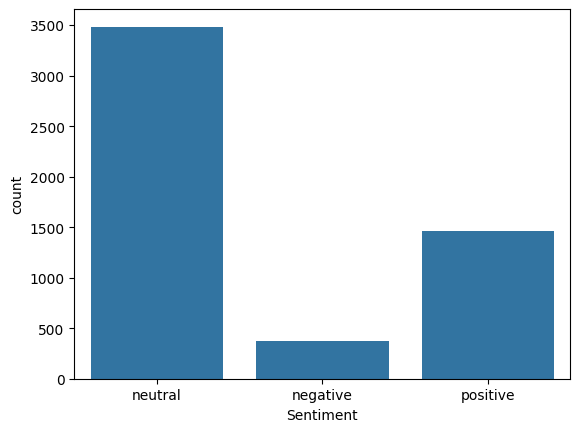

In [70]:
sns.countplot(data=data,x="Sentiment")

In [71]:
# frequency distribution of sentiments
data['Sentiment'].value_counts(normalize=True).mul(100).round(2)

Sentiment
neutral     65.46
positive    27.45
negative     7.08
Name: proportion, dtype: float64

In [72]:
data['word_count'] = data['Sentence'].apply(lambda x: len(x.split()))

In [73]:
data[["Sentence","word_count"]]

,Sentence,word_count
0,the geosolutions technology will leverage bene...,29
1,on lows down 150 to 250 bk a real possibility,10
2,for the last quarter of 2010 componenta s net...,36
3,according to the finnishrussian chamber of com...,18
4,the swedish buyout firm has sold its remaining...,21
...,...,...
5835,hsbc says unit to book 585 million charge on s...,10
5836,daily mail parent company in talks with potent...,17
5838,nordic walking was first used as a summer trai...,13
5839,according shipping company viking line the eu...,14


In [74]:
data['word_count'].describe()

count    5322.000000
mean       18.407366
std         9.059647
min         1.000000
25%        11.000000
50%        17.000000
75%        24.000000
max        52.000000
Name: word_count, dtype: float64

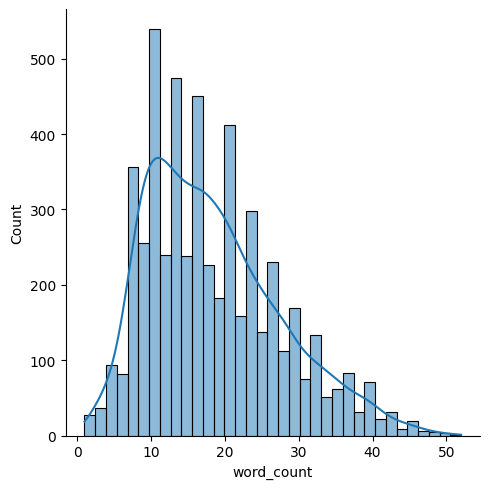

In [75]:
sns.displot(data['word_count'], kde=True)

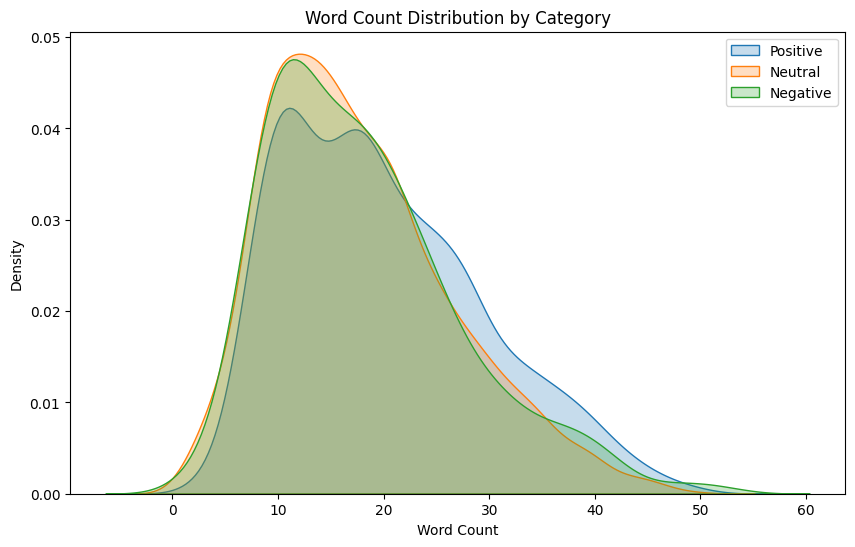

In [76]:
# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot KDE for category 1
sns.kdeplot(data[data['Sentiment'] == "positive"]['word_count'], label='Positive', fill=True)

# Plot KDE for category 0
sns.kdeplot(data[data['Sentiment'] == "neutral"]['word_count'], label='Neutral', fill=True)

# Plot KDE for category -1
sns.kdeplot(data[data['Sentiment'] == "negative"]['word_count'], label='Negative', fill=True)

# Add title and labels
plt.title('Word Count Distribution by Category')
plt.xlabel('Word Count')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()

<Axes: ylabel='word_count'>

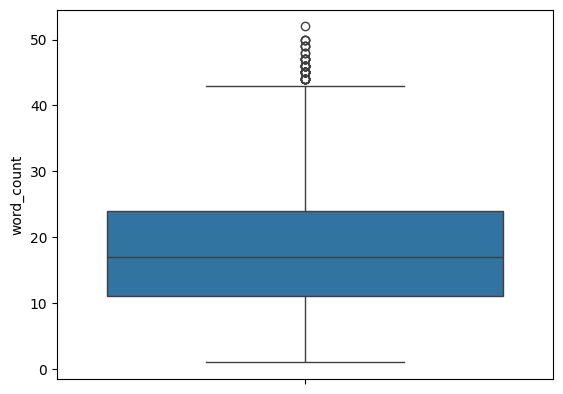

In [77]:
sns.boxplot(data['word_count'])

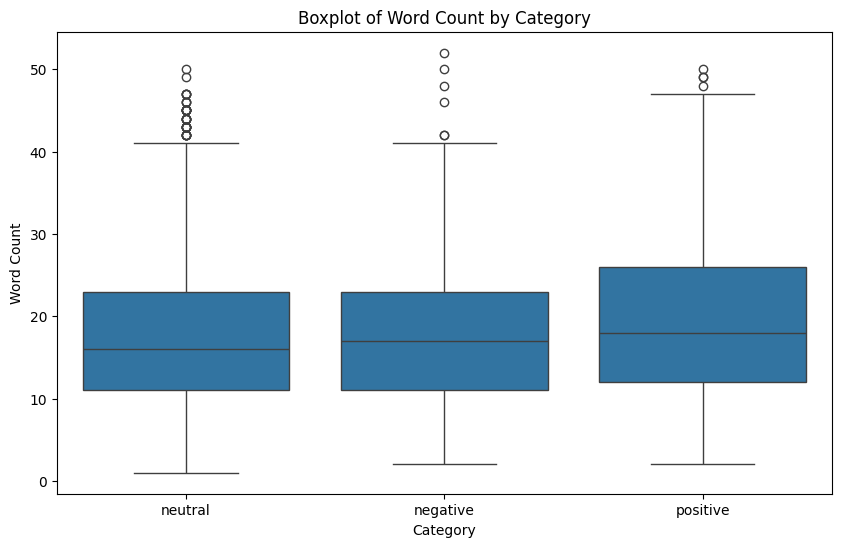

In [78]:
# Create a boxplot for the 'wordcount' column categorized by 'category'
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Sentiment', y='word_count')
plt.title('Boxplot of Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

In [79]:
#!pip install nltk

In [ ]:
# from nltk.corpus import stopwords

# # Download NLTK stopwords if not already downloaded
# import nltk
# nltk.download('stopwords')


In [ ]:
# # Define the list of English stopwords
stop_words = set(stopwords.words('english'))

In [81]:
# Create a new column 'num_stop_words' by counting the number of stopwords in each comment
data['stopword_count'] = data['Sentence'].apply(lambda x: len([word for word in x.split() if word in stop_words]))

In [82]:
data.sample(5)

,Sentence,Sentiment,Symbols,word_count,stopword_count
3320,previously the company had guided for ebit an...,positive,"[,, .]",20,8
1254,it is part of the development of the worldclas...,neutral,"[-, ,, -, .]",34,16
3483,long short url,neutral,"[$tsla, $mbly, <, >]",3,0
4439,the technology park will be built near st pete...,neutral,"[., -, .]",11,3
593,from merisatama to the far corners of the worl...,positive,"[+, +, .]",30,14


<Axes: xlabel='Sentiment', ylabel='stopword_count'>

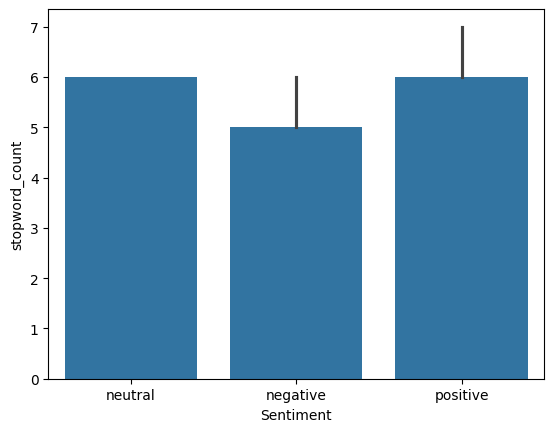

In [85]:
# median word counts among sentiments

sns.barplot(data,x='Sentiment',y='stopword_count',estimator='median')

/tmp/ipykernel_1036/802394538.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_df, x='count', y='stop_word', palette='viridis')


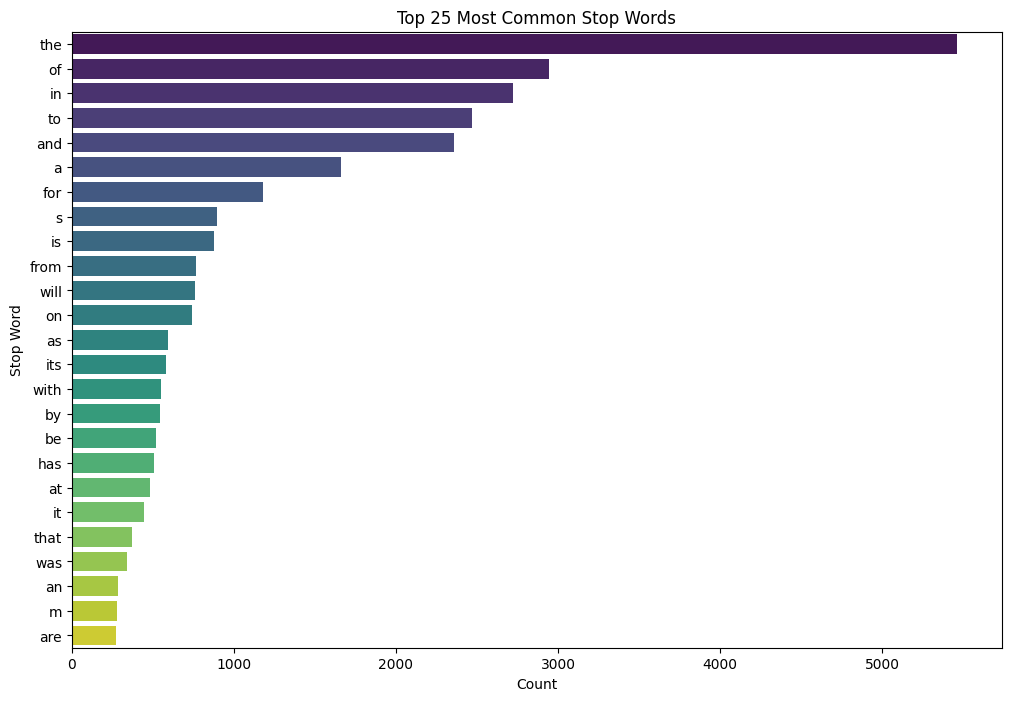

In [88]:
# Create a frequency distribution of stop words in the 'clean_comment' column
from collections import Counter

# Extract all stop words from the comments using the previously defined 'common_stopwords'
all_stop_words = [word for comment in data['Sentence'] for word in comment.split() if word in stop_words]

# Count the most common stop words
most_common_stop_words = Counter(all_stop_words).most_common(25)

# Convert the most common stop words to a DataFrame for plotting
top_25_df = pd.DataFrame(most_common_stop_words, columns=['stop_word', 'count'])

# Create the barplot for the top 25 most common stop words
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_df, x='count', y='stop_word', palette='viridis')
plt.title('Top 25 Most Common Stop Words')
plt.xlabel('Count')
plt.ylabel('Stop Word')
plt.show()

In [89]:
from collections import Counter

In [90]:
# Combine all comments into one large string
all_text = ' '.join(data['Sentence'])

# Count the frequency of each character
char_frequency = Counter(all_text)

# Convert the character frequency into a DataFrame for better display
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)


In [91]:
char_frequency_df['character'].values

array([' ', 'e', 'a', 't', 'n', 'o', 'i', 'r', 's', 'l', 'd', 'c', 'h',
       'u', 'm', 'p', 'f', 'g', 'b', 'y', 'w', '0', 'v', 'k', '2', '1',
       '5', '3', 'x', '4', 'j', '6', '8', '7', '9', 'q', 'z', 'ñ', 'â',
       'à', 'ó', 'á', '¼', 'ã', 'ä', '_', 'é', 'ú', 'í'], dtype=object)

In [94]:
char_frequency_df.tail(20)

,character,frequency
34,4,1076
33,j,1065
30,6,1049
35,8,1040
29,7,1037
36,9,1031
27,q,886
31,z,359
37,ñ,70
40,â,22


In [95]:
# Create a new column 'num_punctuation_chars' to count punctuation characters in each comment
data['num_punctuation_chars'] = data['Sentence'].apply(
    lambda x: sum([1 for char in x if char in '.,!?;:"\'()[]{}-'])
)

data.sample(5)

,Sentence,Sentiment,Symbols,word_count,stopword_count,num_punctuation_chars
2687,why id buy arm holdings plc and bhp billiton p...,neutral,['],11,2,0
4179,svyturysutenos alus which is controlled by th...,positive,"[-, ,, (, ), ,, ., -, ., .]",27,8,0
2197,in 2006 452 million tonnes co2 of eua eu all...,negative,"[,, (, ;, ), .]",22,6,0
3627,veidekke headquartered in oslo norway is a ...,positive,"[,, ,, ,, ,, ,, ,, ., .]",30,11,0
4784,tip of the week panfish like bluegills are gre...,neutral,"[,, .]",18,6,0


In [96]:
from sklearn.feature_extraction.text import CountVectorizer

/tmp/ipykernel_1036/3579266903.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma')


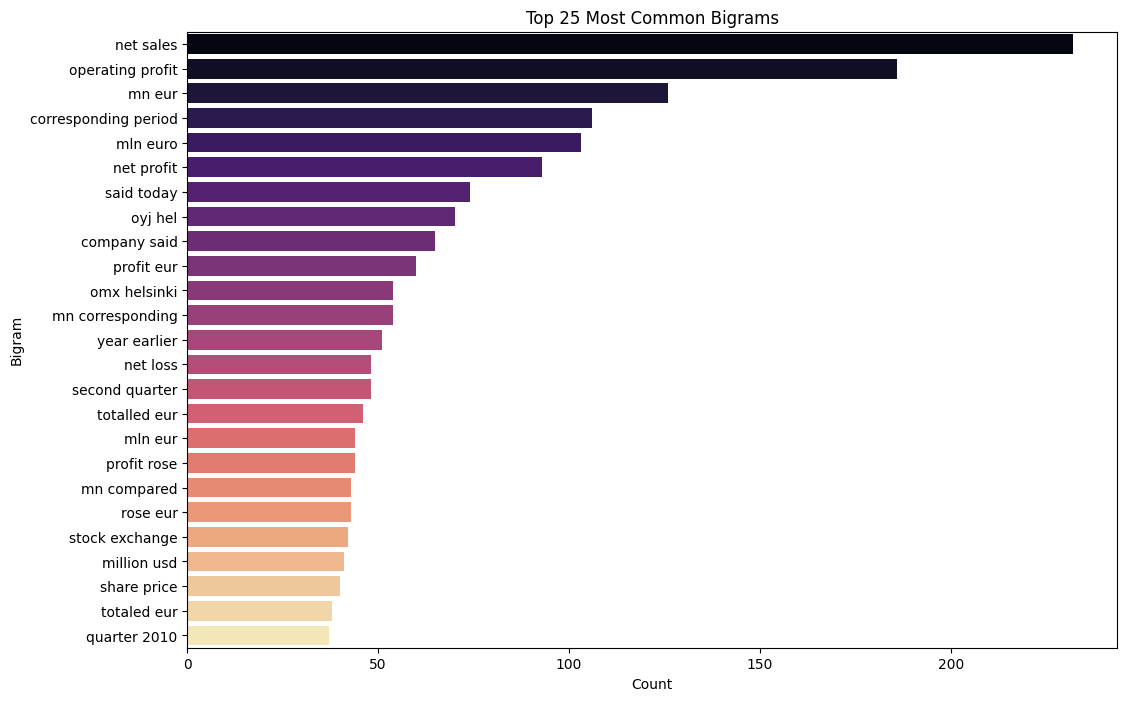

In [97]:
# Create a function to extract the top 25 bigrams
def get_top_ngrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 25 bigrams
top_25_bigrams = get_top_ngrams(data['Sentence'], 25)

# Convert the bigrams into a DataFrame for plotting
top_25_bigrams_df = pd.DataFrame(top_25_bigrams, columns=['bigram', 'count'])

# Plot the countplot for the top 25 bigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma')
plt.title('Top 25 Most Common Bigrams')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.show()

/tmp/ipykernel_1036/2991649309.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_trigrams_df, x='count', y='trigram', palette='coolwarm')


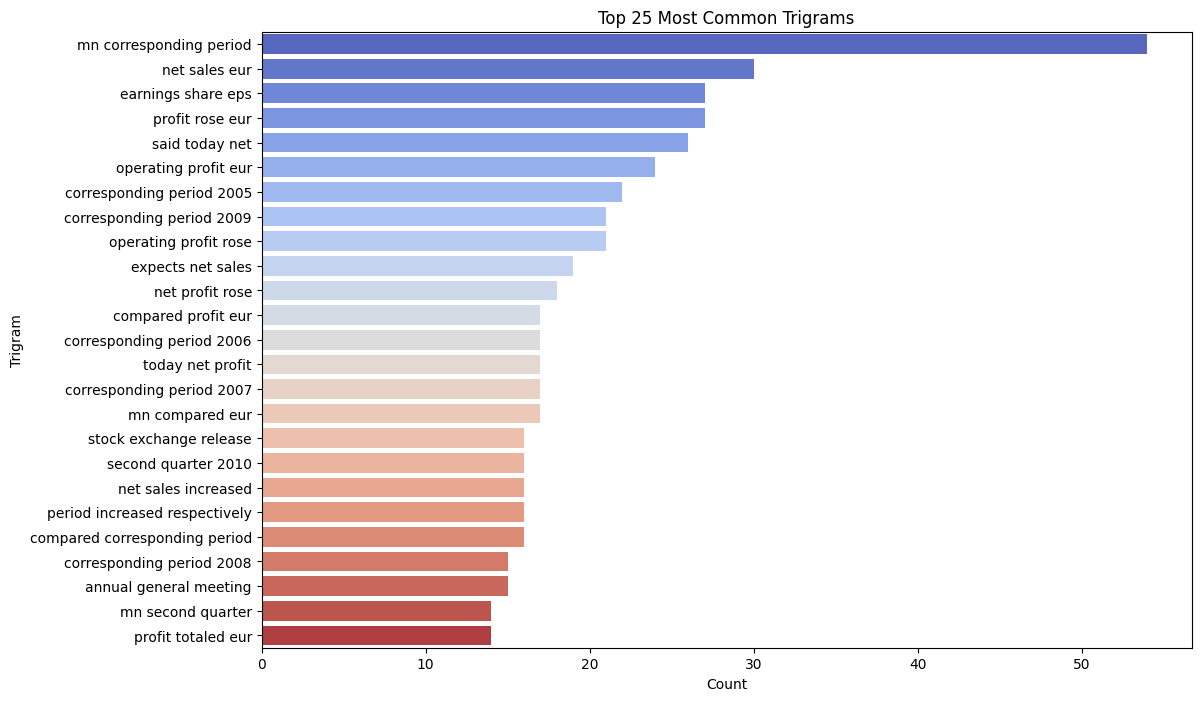

In [98]:
# Create a function to extract the top 25 trigrams
def get_top_trigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 25 trigrams
top_25_trigrams = get_top_trigrams(data['Sentence'], 25)

# Convert the trigrams into a DataFrame for plotting
top_25_trigrams_df = pd.DataFrame(top_25_trigrams, columns=['trigram', 'count'])

# Plot the countplot for the top 25 trigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_trigrams_df, x='count', y='trigram', palette='coolwarm')
plt.title('Top 25 Most Common Trigrams')
plt.xlabel('Count')
plt.ylabel('Trigram')
plt.show()

In [99]:
data['Sentence'] = data['Sentence'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s!?.,]', '', str(x)))

In [100]:
all_text = ' '.join(data['Sentence'])

# Count the frequency of each character
char_frequency = Counter(all_text)

# Convert the character frequency into a DataFrame for better display
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)

char_frequency_df

,character,frequency
3,,105074
2,e,52796
16,a,38335
0,t,38281
10,n,36601
5,o,36104
9,i,35913
15,r,32954
6,s,32318
7,l,20417


In [101]:
data.head()

,Sentence,Sentiment,Symbols,word_count,stopword_count,num_punctuation_chars
0,the geosolutions technology will leverage bene...,neutral,"[', ,, ,, .]",29,8,0
1,on lows down 150 to 250 bk a real possibility,negative,"[$esi, ,, $, ., $, .]",10,4,0
2,for the last quarter of 2010 componenta s net...,neutral,"[,, ', ,, -, -, .]",36,17,0
3,according to the finnishrussian chamber of com...,neutral,"[-, ,, .]",18,8,0
4,the swedish buyout firm has sold its remaining...,neutral,"[., ,, .]",21,6,0


In [102]:
# Defining stop words but keeping essential ones for sentiment analysis
stop_words = set(stopwords.words('english')) - {'not', 'but', 'however', 'no', 'yet','not', 'nor', 'neither','never'
}

# Remove stop words from 'clean_comment' column, retaining essential ones
data['Sentence'] = data['Sentence'].apply(
    lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words])
)

In [103]:
data.head()

,Sentence,Sentiment,Symbols,word_count,stopword_count,num_punctuation_chars
0,geosolutions technology leverage benefon gps s...,neutral,"[', ,, ,, .]",29,8,0
1,lows 150 250 bk real possibility,negative,"[$esi, ,, $, ., $, .]",10,4,0
2,last quarter 2010 componenta net sales doubled...,neutral,"[,, ', ,, -, -, .]",36,17,0
3,according finnishrussian chamber commerce majo...,neutral,"[-, ,, .]",18,8,0
4,swedish buyout firm sold remaining 224 percent...,neutral,"[., ,, .]",21,6,0


In [104]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [105]:
# Define the lemmatize
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to the 'clean_comment_no_stopwords' column
data['Sentence'] = data['Sentence'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()])
)

data.head()

,Sentence,Sentiment,Symbols,word_count,stopword_count,num_punctuation_chars
0,geosolutions technology leverage benefon gps s...,neutral,"[', ,, ,, .]",29,8,0
1,low 150 250 bk real possibility,negative,"[$esi, ,, $, ., $, .]",10,4,0
2,last quarter 2010 componenta net sale doubled ...,neutral,"[,, ', ,, -, -, .]",36,17,0
3,according finnishrussian chamber commerce majo...,neutral,"[-, ,, .]",18,8,0
4,swedish buyout firm sold remaining 224 percent...,neutral,"[., ,, .]",21,6,0


In [109]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

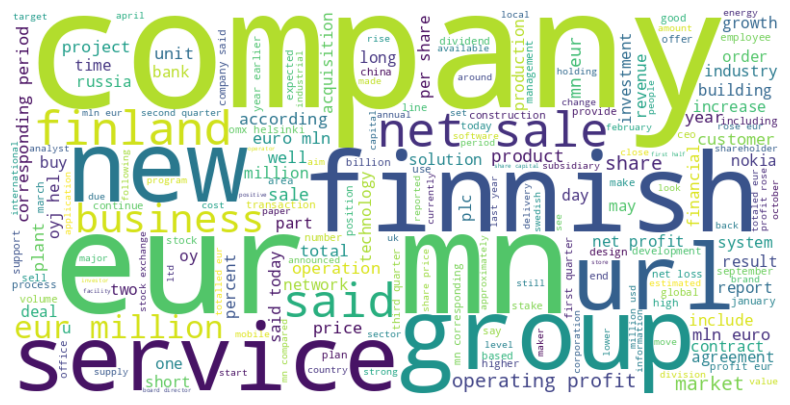

In [110]:
def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(data['Sentence'])

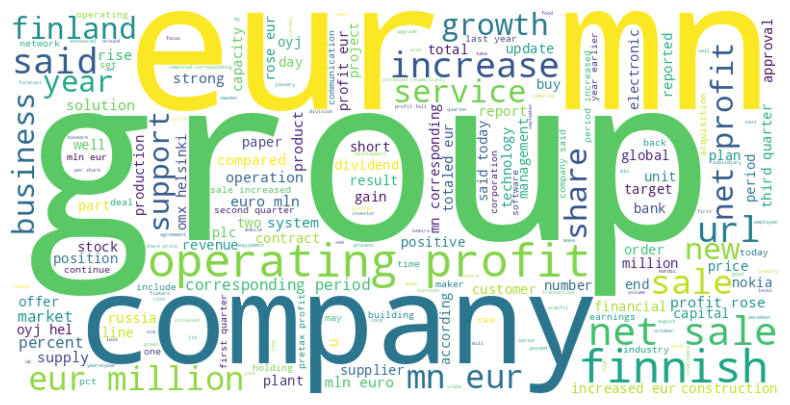

In [111]:
def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(data[data['Sentiment'] == "positive"]['Sentence'])

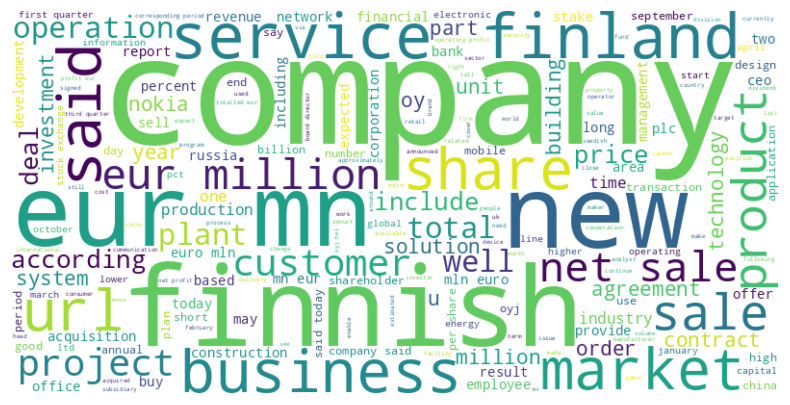

In [112]:
def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(data[data['Sentiment'] == "neutral"]['Sentence'])

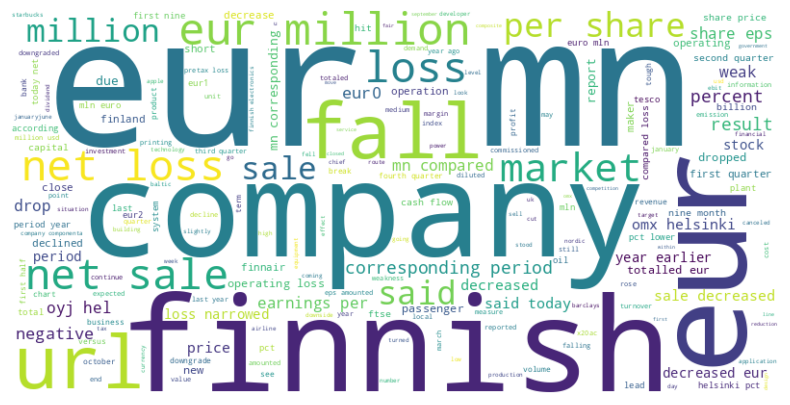

In [114]:
def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(data[data['Sentiment'] == "negative"]['Sentence'])

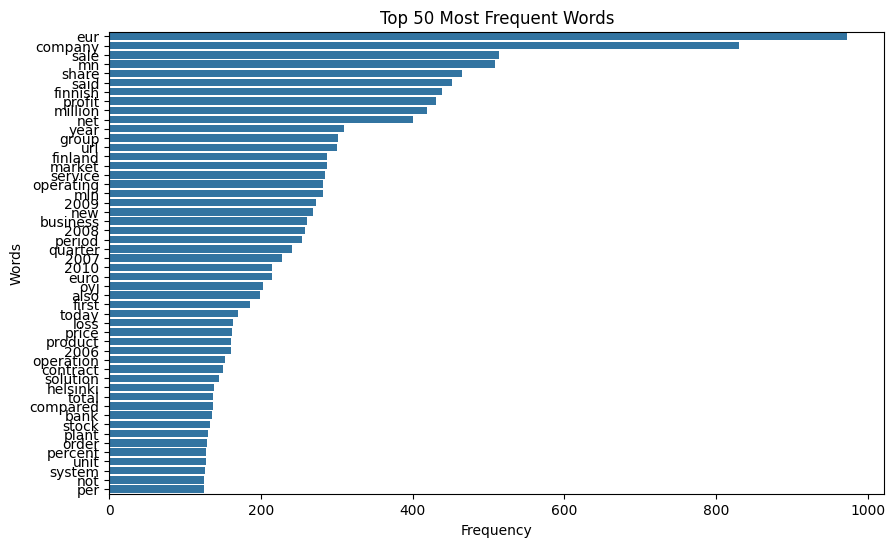

In [115]:
def plot_top_n_words(df, n=20):
    """Plot the top N most frequent words in the dataset."""
    # Flatten all words in the content column
    words = ' '.join(df['Sentence']).split()

    # Get the top N most common words
    counter = Counter(words)
    most_common_words = counter.most_common(n)

    # Split the words and their counts for plotting
    words, counts = zip(*most_common_words)

    # Plot the top N words
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(f'Top {n} Most Frequent Words')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

# Example usage
plot_top_n_words(data, n=50)